In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 标量的基本情况，变量名称、描述和类型
pd.read_excel("./GiveMeSomeCredit/Data Dictionary.xls")

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [3]:
pd.read_excel("./GiveMeSomeCredit/数据属性.xlsx")

,变量名字,描述,类型
0,SeriousDlqin2yrs,好坏客户,Y/N
1,RevolvingUtilizationOfUnsecuredLines,信用卡和个人信用额度的总余额，除了房地产和没有分期付款债务，如汽车贷款除以信用额度,percentage
2,age,出生年龄,integer
3,NumberOfTime30-59DaysPastDueNotWorse,过去两年借款35-59天逾期但是不糟糕的次数,integer
4,DebtRatio,每月债务支付、赡养费、生活费用除以毛利,percentage
5,MonthlyIncome,月收入,real
6,NumberOfOpenCreditLinesAndLoans,开放式贷款（分期付款汽车贷款或抵押贷款）和信用额度（信用卡）的次数,integer
7,NumberOfTimes90DaysLate,>= 90天逾期,integer
8,NumberRealEstateLoansOrLines,抵押贷款和房地产贷款包括房屋净值信贷额度,integer
9,NumberOfTime60-89DaysPastDueNotWorse,过去两年借款60-89天逾期但是不糟糕的次数,integer


In [4]:
df = pd.read_csv("./GiveMeSomeCredit/cs-training.csv").drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

通过 info() 可以看出一共有150000条信息，MonthyIncome 和 NumberOfDependents 存在缺失的情况，MonthyIncome 缺失29731个数据，NumberOfDependents 缺失3924个数据。

下面使用 describe() 来看数据集中的计数、均值、最大最小值、标准差和第一、二、三个四分位值，同时增加了缺失率的计算

In [7]:
df.describe().T.assign(missing_rate = df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_rate
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0,0.000000
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0,0.000000
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0,0.000000
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0,0.000000
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0,0.198207
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0,0.000000
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0,0.000000
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0,0.000000


### 缺失值处理：
    1、由于 MonthyIncome 缺失较多，因此不适合直接进行删除，这边根据变量之间存在的关系来填补缺失值，并采用随机森林的方法；
    
    2、NumberOfDependents 的缺失较少，对于整体的样本影响有限，因此这边直接进行删除操作，后续也可以进行一些其他的填补操作。

In [12]:
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 把已有的数值型特征取出来
    process_df = df.iloc[:, [5,0,1,2,3,4,6,7,8,9]]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.MonthlyIncome.notnull()].values
    unknown = process_df[process_df.MonthlyIncome.isnull()].values
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [13]:
df = set_missing(df)

预测值：  [8311. 1159. 8311. ... 1159. 2554. 2554.]


D:\pycharm\anaconda\app\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [14]:
df = df.dropna() # 删除缺失值

In [15]:
df = df.drop_duplicates() # 删除重复值

### 异常值处理：
    异常值：偏离大多数抽样数据的数值，通常指测定值中与平均值的偏差超过两倍标准差的测定值
    
    通常采用离群值检测的方法对异常值进行检测

**RevolvingUtilizationOfUnsecuredLines**

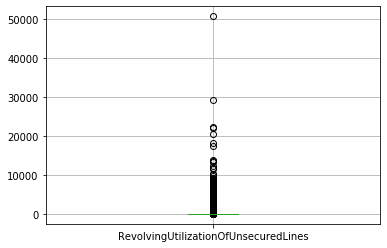

In [16]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box", grid=True)

In [17]:
# 使用2来代替大于2的值
revNew = []
for val in df.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)

In [18]:
df.RevolvingUtilizationOfUnsecuredLines = revNew

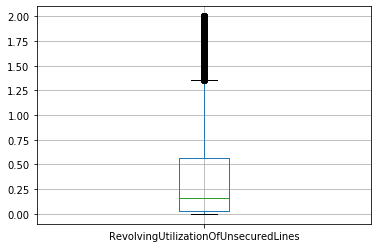

In [19]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box",grid=True)

**age**

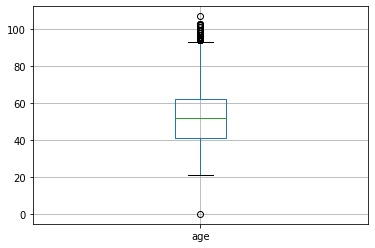

In [20]:
df.age.plot.box(grid=True)

In [21]:
# 发现 age 属性中存在0值情况，而这些数据明显是异常值，因此对其进行处理
df = df[df["age"] > 0]

**NumberOfTime30-59DaysPastDueNotWorse**

**NumberOfTime60-89DaysPastDueNotWorse**

**NumberOfTimes90DaysLate**

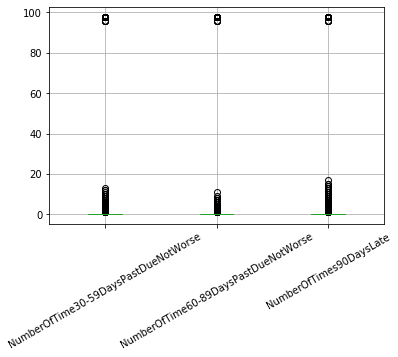

In [22]:
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)

上面的箱线图可以看出 NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate三个特征都存在两个异常值，下面使用 unique() 方法查看具体的异常值

In [23]:
print("NumberOfTime30-59DaysPastDueNotWorse:", df["NumberOfTime30-59DaysPastDueNotWorse"].unique())
print("NumberOfTime60-89DaysPastDueNotWorse:", df["NumberOfTime60-89DaysPastDueNotWorse"].unique())
print("NumberOfTimes90DaysLate:", df["NumberOfTimes90DaysLate"].unique())

NumberOfTime30-59DaysPastDueNotWorse: [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
NumberOfTime60-89DaysPastDueNotWorse: [ 0  1  2  5  3 98  4  6  7  8 96 11  9]
NumberOfTimes90DaysLate: [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]


In [24]:
def replaceOutlier(data):
    New = []
    med = data.median()
    for val in data:
        if ((val == 98) | (val == 96)):
            New.append(med)
        else:
            New.append(val)
    return New

df["NumberOfTime30-59DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime30-59DaysPastDueNotWorse"])
df["NumberOfTime60-89DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime60-89DaysPastDueNotWorse"])
df["NumberOfTimes90DaysLate"] = replaceOutlier(df["NumberOfTimes90DaysLate"])

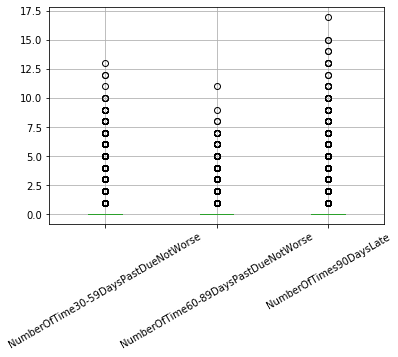

In [25]:
# 下图可以看出 NumberOfTime30-59DaysPastDueNotWorse 删除 98 和 96 两个异常值时，
# NumberOfTime60-89DaysPastDueNotWorse 和 NumberOfTimes90DaysLate 的两个异常值也同时删除了
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)
plt.show()

**DebtRatio**

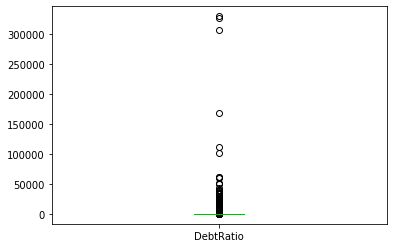

In [26]:
df["DebtRatio"].plot(kind="box")

In [27]:
# 使用中位数绝对偏差 MAD（median absolute deviation）方法进行异常值的检测
from scipy.stats import norm

def mad_based_outlier(points, thresh=3.5):
    if type(points) is list:
        points = np.asarray(points)
    if len(points.shape) == 1:
        points = points[:, None]
    med = np.median(points, axis=0)
    abs_dev = np.absolute(points - med)
    med_abs_dev = np.median(abs_dev)

    mod_z_score = norm.ppf(0.75) * abs_dev / med_abs_dev
    return mod_z_score > thresh

In [28]:
# 检测出最小的异常值,用于替换异常值
minUpperBound = min([val for (val, out) in zip(df.DebtRatio, mad_based_outlier(df.DebtRatio)) if out == True])

In [29]:
newDebtRatio = []
for val in df.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

df.DebtRatio = newDebtRatio

In [30]:
df.DebtRatio.describe()

count    145562.000000
mean          0.571777
std           0.546250
min           0.000000
25%           0.173933
50%           0.359088
75%           0.770648
max           1.566521
Name: DebtRatio, dtype: float64

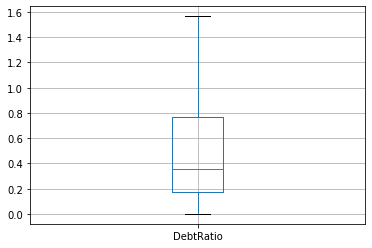

In [31]:
df["DebtRatio"].plot.box(grid=True)

**Monthly income**

In [32]:
df.MonthlyIncome.describe()

count    1.455620e+05
mean     6.116310e+03
std      1.318226e+04
min      0.000000e+00
25%      2.554000e+03
50%      5.000000e+03
75%      8.166000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

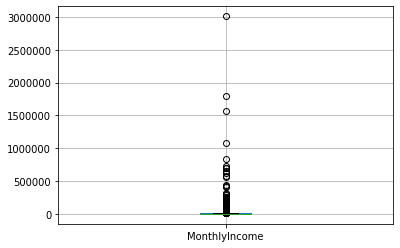

In [33]:
df.MonthlyIncome.plot.box(grid=True)

In [34]:
minUpperBound_MonthlyIncome = min([val for (val, out) in zip(df.MonthlyIncome, mad_based_outlier(df.MonthlyIncome)) if out == True])

In [35]:
newMonthlyIncome = []
for val in df.MonthlyIncome:
    if val > minUpperBound_MonthlyIncome:
        newMonthlyIncome.append(minUpperBound_MonthlyIncome)
    else:
        newMonthlyIncome.append(val)

df.MonthlyIncome = newMonthlyIncome

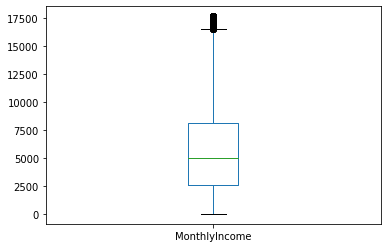

In [36]:
df.MonthlyIncome.plot.box()

**NumberOfOpenCreditLinesAndLoans**

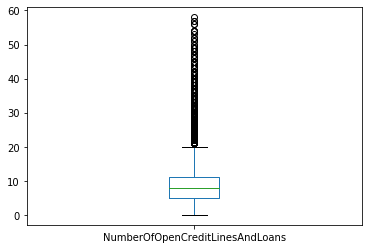

In [37]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box")

In [38]:
minUpperBound_NumberOfOpenCreditLinesAndLoans = min([val for (val, out) in zip(df.NumberOfOpenCreditLinesAndLoans, mad_based_outlier(df.NumberOfOpenCreditLinesAndLoans)) if out == True])

In [39]:
newNumberOfOpenCreditLinesAndLoans = []
for val in df.NumberOfOpenCreditLinesAndLoans:
    if val > minUpperBound_NumberOfOpenCreditLinesAndLoans:
        newNumberOfOpenCreditLinesAndLoans.append(minUpperBound_NumberOfOpenCreditLinesAndLoans)
    else:
        newNumberOfOpenCreditLinesAndLoans.append(val)

df.NumberOfOpenCreditLinesAndLoans = newNumberOfOpenCreditLinesAndLoans

In [40]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    145562.000000
mean          8.503689
std           4.936663
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          24.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

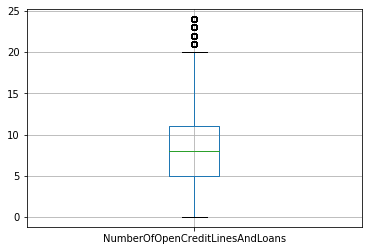

In [41]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box", grid=True)

**NumberRealEstateLoansOrLines**

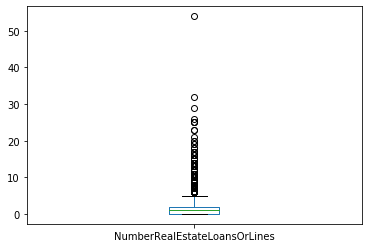

In [42]:
df["NumberRealEstateLoansOrLines"].plot(kind="box")

In [43]:
realNew = []
for val in df.NumberRealEstateLoansOrLines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)

df.NumberRealEstateLoansOrLines = realNew

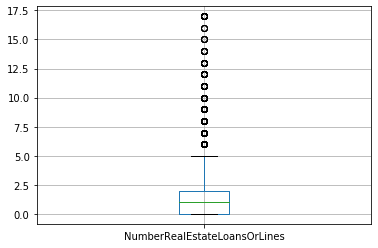

In [44]:
df["NumberRealEstateLoansOrLines"].plot(kind="box", grid=True)

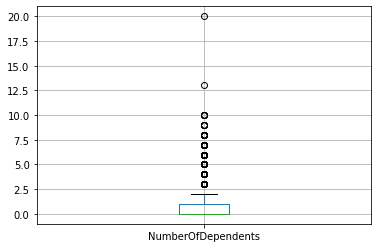

In [45]:
df.NumberOfDependents.plot.box(grid=True)

In [46]:
depNew = []
for var in df.NumberOfDependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

df.NumberOfDependents = depNew

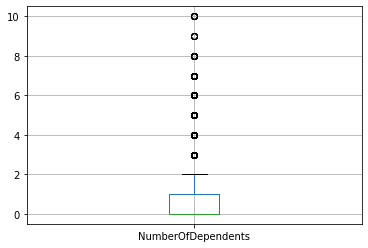

In [47]:
df.NumberOfDependents.plot.box(grid=True)

### 数据切分
    将数据进行切分，分成训练集和测试集两部分

In [71]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


In [72]:
Y = df["SeriousDlqin2yrs"]
X = df.iloc[:, 1:]
# 测试和训练数据进行3：7的比例进行切分 random_state定一个值是的每次运行的时候不会被随机分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)

train.to_csv('TrainData.csv',index=False)
test.to_csv('TestData.csv',index=False)

### 探索性数据分析
    一般采用直方图、散点图和箱线图等来进行分析

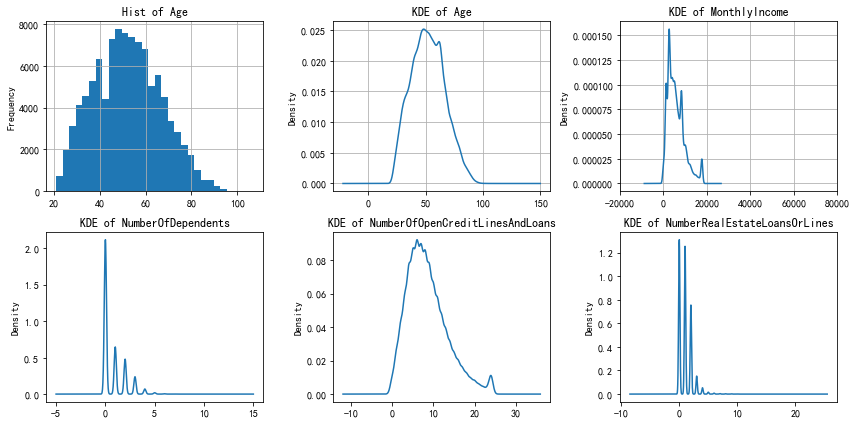

In [73]:
# 下面利用直方图和核密度估计画图，Age、MonthlyIncome、NumberOfOpenCreditLinesAndLoans大致呈正太分布，符合统计分析

fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2, 3), (0, 0))
train["age"].plot(kind="hist", bins=30, figsize=(12, 6), grid=True)
plt.title("Hist of Age")

plt.subplot2grid((2, 3), (0, 1))
train["age"].plot(kind="kde", grid=True)
plt.title("KDE of Age")

plt.subplot2grid((2, 3), (0, 2))
train["MonthlyIncome"].plot(kind="kde", grid=True)
plt.xlim(-20000, 80000)
plt.title("KDE of MonthlyIncome")

plt.subplot2grid((2, 3), (1, 0))
train["NumberOfDependents"].plot(kind="kde")
plt.title("KDE of NumberOfDependents")

plt.subplot2grid((2, 3), (1, 1))
train["NumberOfOpenCreditLinesAndLoans"].plot(kind="kde")
plt.title("KDE of NumberOfOpenCreditLinesAndLoans")

plt.subplot2grid((2, 3), (1, 2))
train["NumberRealEstateLoansOrLines"].plot(kind="kde")
plt.title("KDE of NumberRealEstateLoansOrLines")

# 解决中文的显示问题
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.tight_layout() # 调整子图之间的间距，紧凑显示图像
plt.show()

### 特征选择
    变量分箱：
    
        将连续变量离散化
           
        将多状态的离散变量合并成少状态
              
    变量分箱的重要性：
    
        1、稳定性：避免特征中无意义的波动对评分带来波动
        
        2、健壮性：避免极端值的影响
        
     变量分箱的优势：
     
         1、可以将缺失值作为一个独立的箱带入模型中
         
         2、将所有的变量变换到相似的尺度上
         
     变量分箱的劣势：
     
         1、计算量大
         
         2、分箱之后需要编码
      
     变量分箱常用的方法：
     
         有监督的：
            
            1、Best-KS； 2、ChiMerge（卡方分箱法）
        
         无监督的：
            
            1、等距； 2、等频； 3、聚类

In [74]:
import scipy.stats.stats as stats

# 自定义自动分箱函数
# 定义自动分箱函数---最优分箱
def mono_bin(Y, X, n=20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X.rank(method="first"), n)}) # X.rank(method="first")
        d2 = d1.groupby("Bucket", as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1-d3['rate'])) / (good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe

In [178]:
# 自定义分箱函数
# 对于上述分箱方法不能合理拆分的特征，采用无监督分箱--手动分箱：
def self_bin(Y, X, cat):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y,'Bucket': pd.cut(X, cat)})
    d2 = d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv, woe

In [76]:
dfx1, ivx1, cutx1, woex1 = mono_bin(train.SeriousDlqin2yrs, train.RevolvingUtilizationOfUnsecuredLines, n=10)

                          min       max   sum  total      rate       woe  \
Bucket                                                                     
(0.999, 25474.0]     0.000000  0.031258   464  25474  0.018215 -1.370448   
(25474.0, 50947.0]   0.031260  0.158295   542  25473  0.021277 -1.211902   
(50947.0, 76420.0]   0.158306  0.560505  1323  25473  0.051937 -0.287684   
(76420.0, 101893.0]  0.560523  2.000000  4607  25473  0.180858  1.106155   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 25474.0]          0.066897      0.263382  
(25474.0, 50947.0]        0.078143      0.262550  
(50947.0, 76420.0]        0.190744      0.254326  
(76420.0, 101893.0]       0.664216      0.219742  


In [77]:
dfx2, ivx2, cutx2, woex2 = mono_bin(train.SeriousDlqin2yrs, train.age, n=10)

                        min  max   sum  total      rate       woe  \
Bucket                                                              
(0.999, 11322.333]       21   33  1317  11322  0.116322  0.588970   
(11322.333, 22643.667]   33   40  1078  11321  0.095221  0.365212   
(22643.667, 33965.0]     40   45   984  11322  0.086910  0.264743   
(33965.0, 45286.333]     45   49   934  11321  0.082502  0.207865   
(45286.333, 56607.667]   49   54   839  11321  0.074110  0.091495   
(56607.667, 67929.0]     54   59   667  11322  0.058912 -0.154296   
(67929.0, 79250.333]     59   63   511  11321  0.045137 -0.435158   
(79250.333, 90571.667]   63   71   331  11321  0.029238 -0.885924   
(90571.667, 101893.0]    71  107   275  11322  0.024289 -1.076444   

                        goodattribute  badattribute  
Bucket                                               
(0.999, 11322.333]           0.189879      0.105363  
(11322.333, 22643.667]       0.155421      0.107870  
(22643.667, 33965.0]    

In [78]:
pinf = float('inf') # 正无穷大
ninf = float('-inf') # 负无穷大

In [79]:
cutx3 = [ninf, 0, 1, 3, 5, pinf]
dfx3, ivx3, woex3 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime30-59DaysPastDueNotWorse"], cutx3)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  3571  85522  0.041755 -0.516577       0.514850   
(0.0, 1.0]   1.0   1.0  1694  11086  0.152805  0.903933       0.244233   
(1.0, 3.0]   2.0   3.0  1268   4383  0.289300  1.717911       0.182814   
(3.0, 5.0]   4.0   5.0   324    744  0.435484  2.357188       0.046713   
(5.0, inf]   6.0  13.0    79    158  0.500000  2.616699       0.011390   

             badattribute  
Bucket                     
(-inf, 0.0]      0.863033  
(0.0, 1.0]       0.098908  
(1.0, 3.0]       0.032804  
(3.0, 5.0]       0.004423  
(5.0, inf]       0.000832  


In [80]:
df.DebtRatio.describe()

count    145562.000000
mean          0.571777
std           0.546250
min           0.000000
25%           0.173933
50%           0.359088
75%           0.770648
max           1.566521
Name: DebtRatio, dtype: float64

In [81]:
dfx4, ivx4, cutx4, woex4 = mono_bin(train.SeriousDlqin2yrs, train.DebtRatio, n=20)

                          min       max   sum  total      rate       woe  \
Bucket                                                                     
(0.999, 33965.0]     0.000000  0.235771  2075  33965  0.061092 -0.115632   
(33965.0, 67929.0]   0.235790  0.544337  2154  33964  0.063420 -0.075755   
(67929.0, 101893.0]  0.544357  1.566521  2707  33964  0.079702  0.170297   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 33965.0]          0.299164      0.335836  
(33965.0, 67929.0]        0.310554      0.334994  
(67929.0, 101893.0]       0.390283      0.329170  


In [82]:
dfx5, ivx5, cutx5, woex5 = mono_bin(train.SeriousDlqin2yrs, train.MonthlyIncome, n=10)

                        min      max   sum  total      rate       woe  \
Bucket                                                                  
(0.999, 33965.0]        0.0   3400.0  2747  33965  0.080877  0.186213   
(33965.0, 67929.0]   3400.0   6845.0  2553  33964  0.075168  0.106810   
(67929.0, 101893.0]  6845.0  17694.0  1636  33964  0.048169 -0.366981   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 33965.0]          0.396050      0.328759  
(33965.0, 67929.0]        0.368080      0.330792  
(67929.0, 101893.0]       0.235871      0.340449  


In [83]:
cutx6 = [ninf, 1, 2, 3, 5, pinf]
dfx6, ivx6, woex6 = self_bin(train.SeriousDlqin2yrs, train.NumberOfOpenCreditLinesAndLoans, cutx6)

             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 1.0]    0    1   714   3827  0.186569  1.144240       0.102941   
(1.0, 2.0]     2    2   410   4343  0.094405  0.355698       0.059112   
(2.0, 3.0]     3    3   464   5970  0.077722  0.142990       0.066897   
(3.0, 5.0]     4    5  1111  16589  0.066972 -0.017460       0.160179   
(5.0, inf]     6   24  4237  71164  0.059539 -0.143048       0.610871   

             badattribute  
Bucket                     
(-inf, 1.0]      0.032783  
(1.0, 2.0]       0.041419  
(2.0, 3.0]       0.057984  
(3.0, 5.0]       0.163000  
(5.0, inf]       0.704814  


In [84]:
cutx7 = [ninf, 0, 1, 3, pinf]
dfx7, ivx7, woex7 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTimes90DaysLate"], cutx7)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  4656  96308  0.048345 -0.363143       0.671280   
(0.0, 1.0]   1.0   1.0  1206   3608  0.334257  1.927706       0.173875   
(1.0, 3.0]   2.0   3.0   785   1542  0.509079  2.653019       0.113178   
(3.0, inf]   4.0  15.0   289    435  0.664368  3.299519       0.041667   

             badattribute  
Bucket                     
(-inf, 0.0]      0.965195  
(0.0, 1.0]       0.025296  
(1.0, 3.0]       0.007972  
(3.0, inf]       0.001538  


In [85]:
cutx8 = [ninf, 0, 1, 2, 3, pinf]
dfx8, ivx8, woex8 = self_bin(train.SeriousDlqin2yrs, train["NumberRealEstateLoansOrLines"], cutx8)

             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 0.0]    0    0  3226  37444  0.086155  0.255190       0.465110   
(0.0, 1.0]     1    1  1863  35769  0.052084 -0.284705       0.268599   
(1.0, 2.0]     2    2  1254  21766  0.057613 -0.177973       0.180796   
(2.0, 3.0]     3    3   293   4356  0.067264 -0.012805       0.042243   
(3.0, inf]     4   17   300   2558  0.117279  0.598247       0.043253   

             badattribute  
Bucket                     
(-inf, 0.0]      0.360353  
(0.0, 1.0]       0.357067  
(1.0, 2.0]       0.216014  
(2.0, 3.0]       0.042788  
(3.0, inf]       0.023779  


In [86]:
cutx9 = [ninf, 0, 1, 3, pinf]
dfx9, ivx9, woex9 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime60-89DaysPastDueNotWorse"], cutx9)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  5107  96788  0.052765 -0.271004       0.736303   
(0.0, 1.0]   1.0   1.0  1243   4000  0.310750  1.820084       0.179210   
(1.0, 3.0]   2.0   3.0   517    994  0.520121  2.697225       0.074539   
(3.0, inf]   4.0  11.0    69    111  0.621622  3.113136       0.009948   

             badattribute  
Bucket                     
(-inf, 0.0]      0.965500  
(0.0, 1.0]       0.029034  
(1.0, 3.0]       0.005023  
(3.0, inf]       0.000442  


In [87]:
cutx10 = [ninf, 0, 1, 2, pinf]
dfx10, ivx10, woex10 = self_bin(train.SeriousDlqin2yrs, train["NumberOfDependents"], cutx10)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  3579  60340  0.059314 -0.147067       0.516003   
(0.0, 1.0]   1.0   1.0  1344  18421  0.072960  0.074617       0.193772   
(1.0, 2.0]   2.0   2.0  1125  13668  0.082309  0.205319       0.162197   
(2.0, inf]   3.0  10.0   888   9464  0.093829  0.348948       0.128028   

             badattribute  
Bucket                     
(-inf, 0.0]      0.597755  
(0.0, 1.0]       0.179839  
(1.0, 2.0]       0.132091  
(2.0, inf]       0.090315  


### 相关性分析和IV筛选

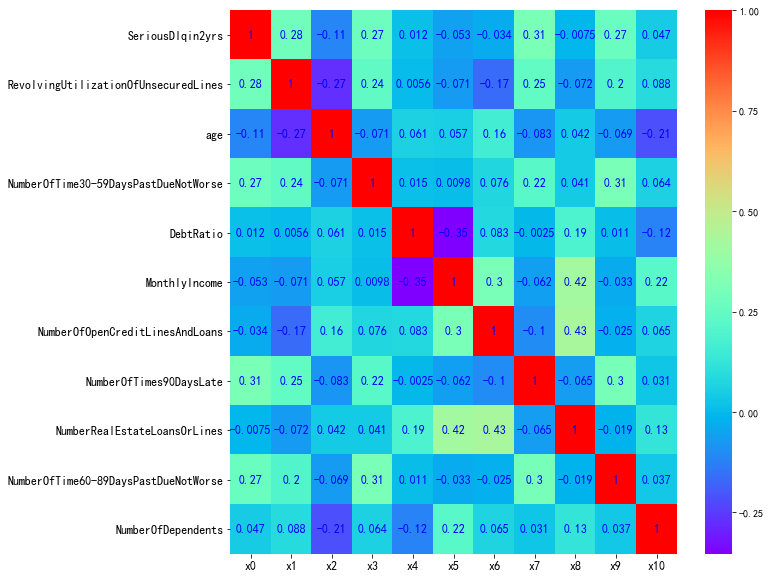

In [88]:
corr = train.corr() # 计算各变量的相关性系数
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴标签
yticks = list(corr.index) # y轴标签
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'blue'}) # 绘制相关性系数热力图
ax.set_xticklabels(xticks, rotation=0, fontsize=12)
ax.set_yticklabels(yticks, rotation=0, fontsize=12)
plt.show()

### 上图可以看出变量之间的相关性都较小，但是 NumberOfOpenCreditLinesAndLoans 和 NumberRealEstateLoansOrLines 相对来说较大为0.43

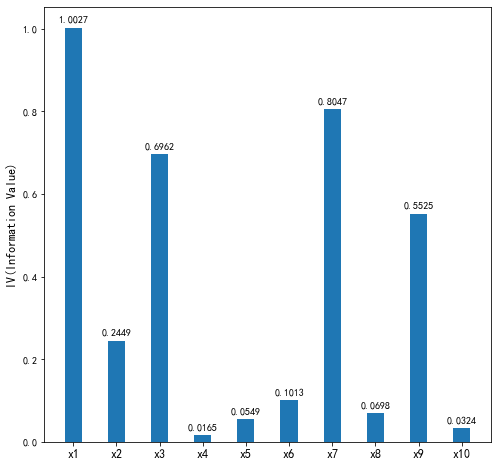

In [89]:
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10] # 各变量IV
index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴的标签
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index)) + 1
ax1.bar(x, ivlist, width=0.4) # 生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=12)
# 在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

通过IV值判断变量预测能力的标准是：

**< 0.02: unpredictive**

**0.02 to 0.1: weak**

**0.1 to 0.3: medium**

**0.3 to 0.5: strong**

**> 0.5: suspicious**

DebtRatio、MonthlyIncome、NumberRealEstateLoansOrLines 和 NumberOfDependents 变量的IV值明显较低

### 模型分析
    WOE转换:
        证据权重（Weight of Evidence,WOE）转换可以将Logistic回归模型转变为标准评分卡格式

In [90]:
# 替换成woe函数
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut)-2
        m = len(cut)-2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [91]:
from pandas import Series
train = pd.read_csv("./TrainData.csv")
train['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
train['age'] = Series(replace_woe(train['age'], cutx2, woex2))
train['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
train['DebtRatio'] = Series(replace_woe(train['DebtRatio'], cutx4, woex4))
train['MonthlyIncome'] = Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
train['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
train['NumberOfTimes90DaysLate'] = Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
train['NumberRealEstateLoansOrLines'] = Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
train['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
train['NumberOfDependents'] = Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
train.to_csv('Woetrain.csv', index=False)

In [92]:
test = pd.read_csv('TestData.csv')
# 替换成woe
test['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
test['age'] = Series(replace_woe(test['age'], cutx2, woex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
test['DebtRatio'] = Series(replace_woe(test['DebtRatio'], cutx4, woex4))
test['MonthlyIncome'] = Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
test['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
test['NumberOfTimes90DaysLate'] = Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
test['NumberRealEstateLoansOrLines'] = Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
test['NumberOfDependents'] = Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
test.to_csv('TestWoeData.csv', index=False)

### 模型预测

In [95]:
from sklearn.model_selection import cross_val_score

def cvDictGen(functions, scr, X_train=X_train, Y_train=Y_train, cv=10, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, Y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[list(cvDict.keys())[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[list(cvDict.keys())[0]][1]))]
    return cvDictNormalized

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [98]:
lrMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [99]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [100]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [101]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [104]:
cvD = cvDictGen(functions=[knMod, lrMod, adaMod, gbMod, rfMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.1s finished


In [105]:
cvD

{'KNeighborsClassifier': [0.588898691479014, 0.011290276615075525],
 'LogisticRegression': [0.8501293425941657, 0.00360518420358041],
 'AdaBoostClassifier': [0.8583352693163672, 0.003792770858572014],
 'GradientBoostingClassifier': [0.8639184273785709, 0.0033838020685726957],
 'RandomForestClassifier': [0.7797695461349287, 0.00999562836136774]}

In [106]:
cvDictNormalize(cvD)

{'KNeighborsClassifier': ['1.00', '1.00'],
 'LogisticRegression': ['1.44', '0.32'],
 'AdaBoostClassifier': ['1.46', '0.34'],
 'GradientBoostingClassifier': ['1.47', '0.30'],
 'RandomForestClassifier': ['1.32', '0.89']}

AdaBoost 、 GB 、 LR的out-of-the-bag较好

### 最优化超参数

AdaBoost模型

In [111]:
from sklearn.model_selection  import RandomizedSearchCV
from scipy.stats import randint

In [112]:
ada_param = {'n_estimators': [10,50,100,200,400],
                 'learning_rate': [0.1, 0.05]}

In [114]:
randomizedSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=ada_param, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=400, learning_rate=0.05 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. n_estimators=400, learning_rate=0.05, total=  27.9s
[CV] n_estimators=400, learning_rate=0.05 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s


[CV] ............. n_estimators=400, learning_rate=0.05, total=  29.8s
[CV] n_estimators=400, learning_rate=0.05 ............................
[CV] ............. n_estimators=400, learning_rate=0.05, total=  26.8s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] ............... n_estimators=50, learning_rate=0.1, total=   3.3s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] ............... n_estimators=50, learning_rate=0.1, total=   3.4s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] ............... n_estimators=50, learning_rate=0.1, total=   3.4s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] .............. n_estimators=100, learning_rate=0.1, total=   6.8s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] .............. n_estimators=100, learning_rate=0.1, total=   6.5s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.6min finished


In [115]:
randomizedSearchAda.best_params_, randomizedSearchAda.best_score_

({'n_estimators': 400, 'learning_rate': 0.1}, 0.8594141762014902)

GB模型

In [116]:
gbParams = {'loss' : ['deviance', 'exponential'],
            'n_estimators': [10,50,100,200,400],
            'max_depth': randint(1,5),
            'learning_rate':[0.1, 0.05]}

In [120]:
randomizedSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbParams, n_iter=10,
                                   scoring='roc_auc',  cv=None, verbose=2).fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=50, total=   2.6s
[CV] learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=50, total=   2.5s
[CV] learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=50 
[CV]  learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=50, total=   2.5s
[CV] learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=100 
[CV]  learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=100, total=   1.8s
[CV] learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=100 
[CV]  learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=100, total=   1.9s
[CV] learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=100 
[CV]  learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=100, total=   1.8s
[CV] learning_rate=0.05, loss=exponential, max_depth=3, n_estimators=400 
[CV]  learning_rate=0.05, loss=exponential, max_depth=3, n_estimators=400, total=  19.7s
[CV] learning_rate=0.05, loss=exponential, max_depth=3, n_estimators=400 
[CV]  learning_rate=0.05, lo

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.9min finished


In [121]:
randomizedSearchGB.best_params_, randomizedSearchGB.best_score_

({'learning_rate': 0.05,
  'loss': 'exponential',
  'max_depth': 3,
  'n_estimators': 400},
 0.8636005725945227)

In [122]:
bestGbModFitted = randomizedSearchGB.best_estimator_.fit(X_train, Y_train)

In [123]:
bestAdaModFitted = randomizedSearchAda.best_estimator_.fit(X_train, Y_train)

In [124]:
cvDictHPO = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.7min finished


In [125]:
cvDictNormalize(cvDictHPO)

{'GradientBoostingClassifier': ['1.00', '1.00'],
 'AdaBoostClassifier': ['0.99', '1.10']}

In [163]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp

    cv = StratifiedKFold(n_splits=nfolds).split(X, y)
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(list(cv))
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()

def rocZeroOne(y_true, y_predicted_porba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)])

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print('\n' + 'ROC曲线最佳点位置: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print('\n' + '最佳截止点: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)

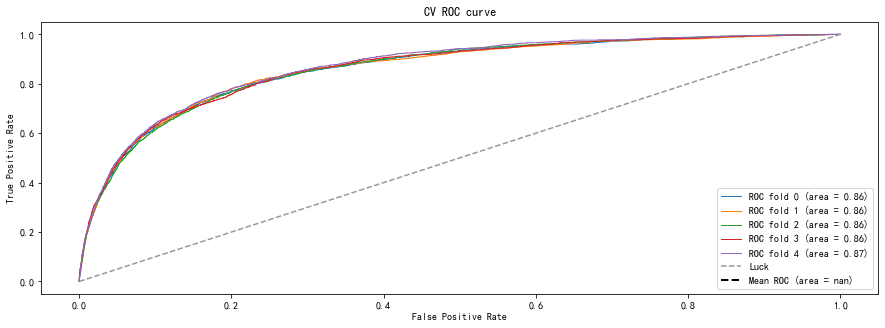

In [164]:
plotCvRocCurve(X, Y, randomizedSearchGB.best_estimator_)


ROC曲线最佳点位置: TPR = 77.755%, FPR = 19.360%

最佳截止点: 0.0694


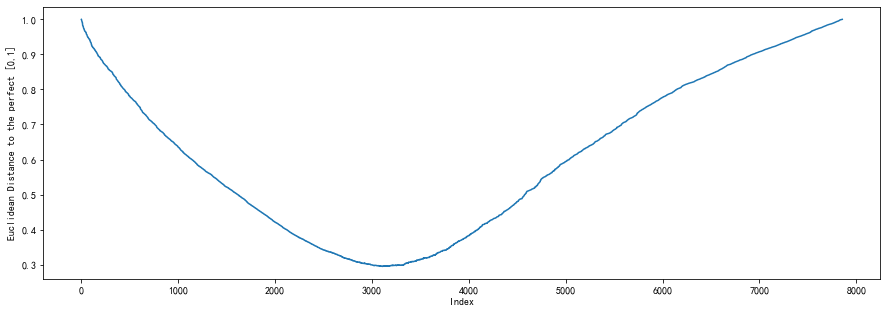

In [165]:
rocZeroOne(Y_test, randomizedSearchGB.predict_proba(X_test))

In [174]:
plotCvRocCurve(X, Y, gridSearchAda.best_estimator_)

NameError: name 'gridSearchAda' is not defined

In [167]:
rocZeroOne(Y_test, gridSearchAda.predict_proba(X_test))

NameError: name 'gridSearchAda' is not defined

In [175]:
lrMod.coef_ 

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

LR模型

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

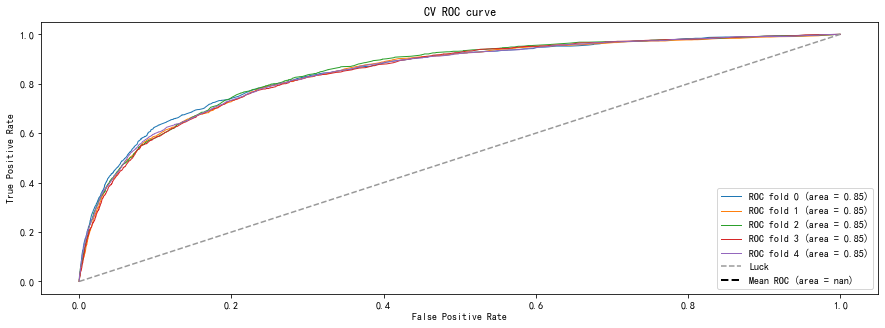

In [176]:
data = pd.read_csv('./Woetrain.csv')
#应变量
data_Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
data_X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
plotCvRocCurve(data_X, data_Y, lrMod.fit(data_X, data_Y))


ROC曲线最佳点位置: TPR = 77.098%, FPR = 23.184%

最佳截止点: 0.0634


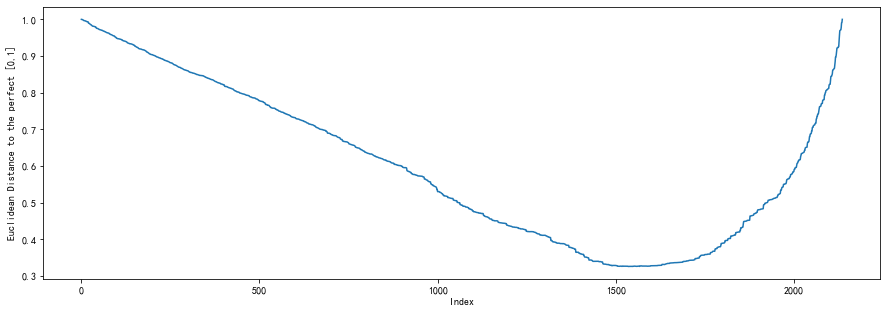

In [177]:
Y_test = test['SeriousDlqin2yrs']
X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
rocZeroOne(Y_test, lrMod.predict_proba(X_test))

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
# 导入数据
data = pd.read_csv('./Woetrain.csv')
#应变量
Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
# X = data.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X1 = sm.add_constant(X)
logit = sm.Logit(Y, X1)
result = logit.fit()
print(result.summary())

In [ ]:
test = pd.read_csv('./TestWoeData.csv')
Y_test = test['SeriousDlqin2yrs']
# X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X3 = sm.add_constant(X_test)
resu = result.predict(X3)
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [ ]:
lrMod.coef_ 

In [ ]:
import math
# coe为逻辑回归模型的系数
coe = [-9.2342, 0.6295, 0.4615, 1.1004, 0.3725, 0.5254, 1.5906, 1.1133]

p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)

In [ ]:
baseScore

In [ ]:
def get_score(coe, woe, factor):
    scores = []
    for w in woe:
        score = round(coe * w * factor, 0)
        scores.append(score)
    return scores

In [ ]:
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x5 = get_score(coe[4], woex5, p)
x6 = get_score(coe[5], woex6, p)
x7 = get_score(coe[6], woex7, p)
x9 = get_score(coe[7], woex9, p)

In [ ]:
print(x1, x2, x3, x5, x6, x7, x9)

In [ ]:
def compute_score(series, cut, score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [ ]:
test1 = pd.read_csv('TestData.csv')
test1['BaseScore'] = Series(np.zeros(len(test1))) + baseScore
test1['x1'] = Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['age'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
test1['x5'] = Series(compute_score(test1['MonthlyIncome'], cutx5, x5))
test1['x6'] = Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], cutx6, x6))
test1['x7'] = Series(compute_score(test1['NumberOfTimes90DaysLate'], cutx7, x7))
test1['x9'] = Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x3'] + test1['x7'] +test1['x9']  + baseScore
test1.to_csv('ScoreData.csv', index=False)

In [ ]:
ScoreData = pd.read_csv("ScoreData.csv")

In [ ]:
ScoreData.info()

In [ ]:
ScoreData[ScoreData.SeriousDlqin2yrs == 0].head()